In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [30]:
a=pd.read_csv(open('E:/ML/knn/iris.csv','rb'))
x=a.iloc[:,1:5]
y=a.iloc[:,5].values

In [31]:
print(a.shape)
print(a.info())
print(a.isnull().sum())

(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


So here we have the data of 150  rows and 6 columns.

.info() method provides us the information like dtype of the columns and non-null count values.

.isnull().sum() will give us the no of null values present in each column. Here we are not having any null values so it is showing 0.

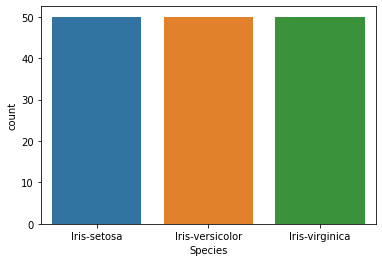

In [32]:
import seaborn as sns
sns.countplot(a['Species'])


Here all three species have equal  no of counts in our dataset

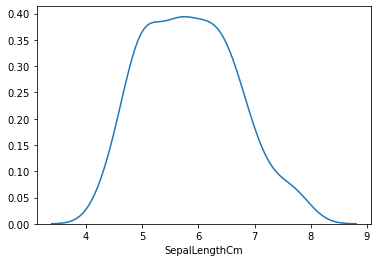

In [22]:
sns.distplot(a['SepalLengthCm'],hist=False)

By default kde is true that means we are getting the density of SepalLength is max when it is in between 5-7 cm.

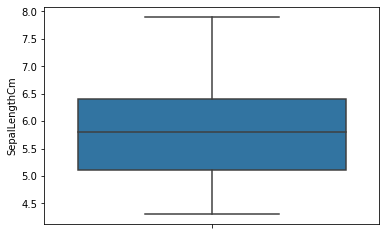

In [26]:
sns.boxplot(a['SepalLengthCm'],orient='v')

Box plot tells about the distribution and outliers if any.
Here we have no outliers the first whisker is short so the values in interqurtile  range starts from 5.1 and goes to 6.4 than we have the longer whisker i.e.  we are having more larger numerical values with less frequency of occurence. The centre line shows us the median which is 5.8. There are no outliers.

In [5]:
print(a.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


.describe() method is used to get the info like mean count etc. of the dataset.
Here 25% 50% 75% are quartiles value when we find the difference between  Q3 and Q1 we will get the quartile range.
Standard deviation is also given which is sqrt of variance which tells us about the dispersion of data.

In [33]:
y= LabelEncoder().fit_transform(y)
y=y.reshape(-1,1)

ohe = OneHotEncoder()
y=ohe.fit_transform(y).toarray()

# Encodings
### Label Encoder
Labelencoding  is  used to provide  the numerical value to the label because machine will easily process the numerical value instead of object type values. But there is an issue that we have the ranking in it and whenever we will use the numerical values the ranking will provide the output which will not be suitable so to remove it we use one hot encoder.

### OneHot Encoder 
It is used to remove the discrepancy created by Labelencoding. It removes the ranking  and replaces it with 0 and 1 value with increase in column no.

eg:- if we have 2 classes a,b in output than we will produce the dummies i.e. a will become [0,0] and b will become [0,1] so 2 columns are added in our dataset if 'class' was the column  name than 'class0' and 'class1' will be 2 new columns added to our dataset.

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [39]:
knn1=knn()
knn1.fit(xtrain, ytrain)
ypred = knn1.predict(xtest)
print(classification_report(ytest,ypred))
print("Acuuracy is : ",accuracy_score(ytest,ypred)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      0.78      0.82         9
           2       0.86      0.92      0.89        13

   micro avg       0.90      0.90      0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30
 samples avg       0.90      0.90      0.90        30

Acuuracy is :  90.0


Precision of class0 (i.e. iris_setos) is 1 as we are not having much no of samples and data is  also too clean and well classified so we are not having any discrepancy over here. Accuracy  is 90 percent.

In [42]:
from sklearn.model_selection import  GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
clf = GridSearchCV(knn1, hyperparameters, cv=10)

Here we are checking for optimal values of leaf_size, n_neighbors and p (i.e. type of distance). For it we are using GridSearchCV which putting each and every value of these 3 parameters  to get the optimal output.

In [44]:
best_model = clf.fit(x,y)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors']

Best leaf_size: 1
Best p: 2


This is the best leaf size and p which will decide the type of distance p=2 means Euclidean Distance.
